<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/RetinalSignalProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

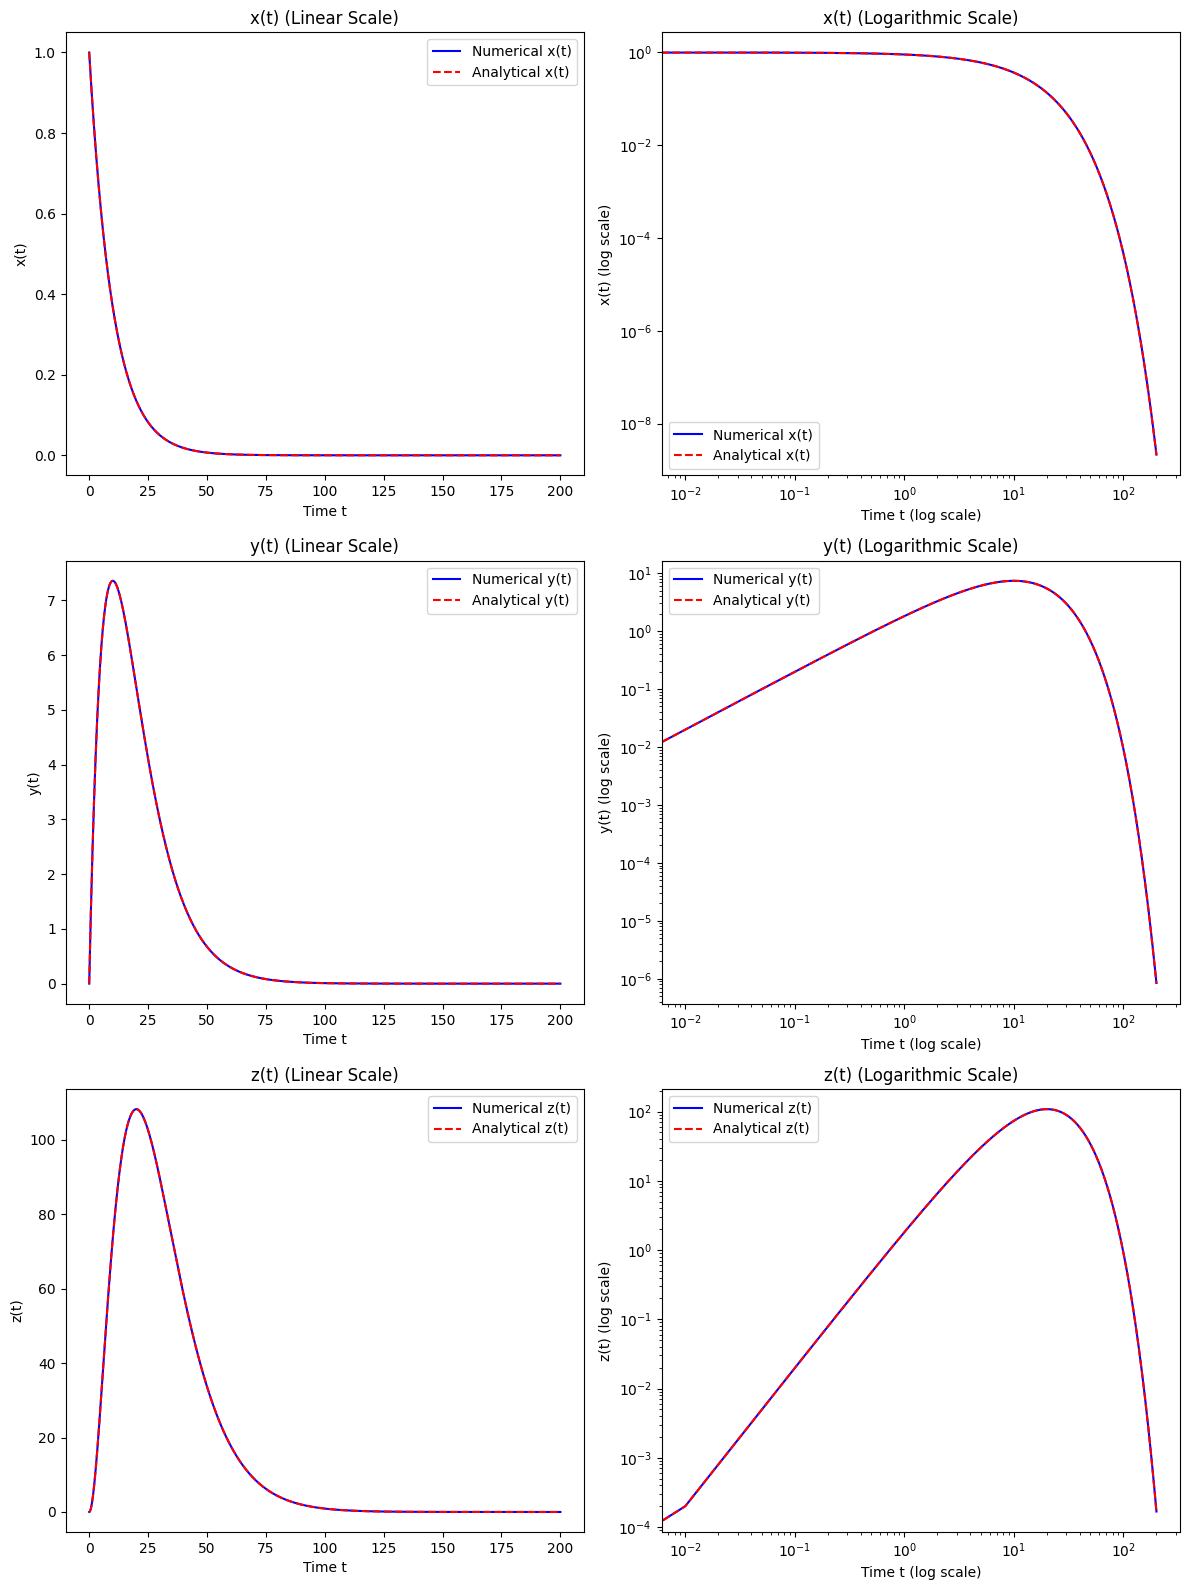

In [19]:
# 상수 설정
tau = 10  # Time constant
k = 20    # Proportional constant

# 함수 정의
def system(t, variables):
    x, y, z = variables
    dx_dt = - (1 / tau) * x
    dy_dt = (1 / tau) * (-y + k * x)
    dz_dt = (1 / tau) * (-z + k * y)
    return [dx_dt, dy_dt, dz_dt]

# 초기값
x0 = 1.0  # x(0)
y0 = 0.0  # y(0)
z0 = 0.0  # z(0)
initial_conditions = [x0, y0, z0]

t = np.arange(0, 200.01, 0.01)  #0.01 step size

# Solve
solution = solve_ivp(system, [t[0], t[-1]], initial_conditions, t_eval=t)

# 해석해
x_analytic = np.exp(-t / tau)
y_analytic = (k * t / tau) * np.exp(-t / tau)
z_analytic = (k**2 / (2 * tau**2)) * t**2 * np.exp(-t / tau)

# Plotting (Linear and Logarithmic)
plt.figure(figsize=(12, 16))

# x(t) plot (Linear)
plt.subplot(3, 2, 1)
plt.plot(t, solution.y[0], 'b-', label='Numerical x(t)')
plt.plot(t, x_analytic, 'r--', label='Analytical x(t)')
plt.legend()
plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.title('x(t) (Linear Scale)')

# x(t) plot (Logarithmic)
plt.subplot(3, 2, 2)
plt.loglog(t, solution.y[0], 'b-', label='Numerical x(t)')
plt.loglog(t, x_analytic, 'r--', label='Analytical x(t)')
plt.legend()
plt.xlabel('Time t (log scale)')
plt.ylabel('x(t) (log scale)')
plt.title('x(t) (Logarithmic Scale)')

# y(t) plot (Linear)
plt.subplot(3, 2, 3)
plt.plot(t, solution.y[1], 'b-', label='Numerical y(t)')
plt.plot(t, y_analytic, 'r--', label='Analytical y(t)')
plt.legend()
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.title('y(t) (Linear Scale)')

# y(t) plot (Logarithmic)
plt.subplot(3, 2, 4)
plt.loglog(t, solution.y[1], 'b-', label='Numerical y(t)')
plt.loglog(t, y_analytic, 'r--', label='Analytical y(t)')
plt.legend()
plt.xlabel('Time t (log scale)')
plt.ylabel('y(t) (log scale)')
plt.title('y(t) (Logarithmic Scale)')

# z(t) plot (Linear)
plt.subplot(3, 2, 5)
plt.plot(t, solution.y[2], 'b-', label='Numerical z(t)')
plt.plot(t, z_analytic, 'r--', label='Analytical z(t)')
plt.legend()
plt.xlabel('Time t')
plt.ylabel('z(t)')
plt.title('z(t) (Linear Scale)')

# z(t) plot (Logarithmic)
plt.subplot(3, 2, 6)
plt.loglog(t, solution.y[2], 'b-', label='Numerical z(t)')
plt.loglog(t, z_analytic, 'r--', label='Analytical z(t)')
plt.legend()
plt.xlabel('Time t (log scale)')
plt.ylabel('z(t) (log scale)')
plt.title('z(t) (Logarithmic Scale)')

plt.tight_layout()
plt.show()
